In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
try:
    matches = pd.read_csv('./top_5_teams_scores.csv')
except Exception as e:
    print(e)

matches.head()

,team,opponent,date,scored,conceded,outcome,tournament
0,Arsenal,Newcastle,1/3/2023,0,0,draw,Premier League
1,Arsenal,Oxford Utd,1/9/2023,3,0,win,FA Cup
2,Arsenal,Tottenham,1/15/2023,2,0,win,Premier League
3,Arsenal,Man United,1/22/2023,3,2,win,Premier League
4,Arsenal,Man City,1/27/2023,0,1,loss,FA Cup


In [66]:
matches['date'] = pd.to_datetime(matches['date'], format='%m/%d/%Y')
# Verify the changes
matches.head()

,team,opponent,date,scored,conceded,outcome,tournament
0,Arsenal,Newcastle,2023-01-03,0,0,draw,Premier League
1,Arsenal,Oxford Utd,2023-01-09,3,0,win,FA Cup
2,Arsenal,Tottenham,2023-01-15,2,0,win,Premier League
3,Arsenal,Man United,2023-01-22,3,2,win,Premier League
4,Arsenal,Man City,2023-01-27,0,1,loss,FA Cup


### Arsenal

In [67]:
arsenal_matches = matches.loc[matches["team"]=='Arsenal',:]
arsenal_matches.head()

,team,opponent,date,scored,conceded,outcome,tournament
0,Arsenal,Newcastle,2023-01-03,0,0,draw,Premier League
1,Arsenal,Oxford Utd,2023-01-09,3,0,win,FA Cup
2,Arsenal,Tottenham,2023-01-15,2,0,win,Premier League
3,Arsenal,Man United,2023-01-22,3,2,win,Premier League
4,Arsenal,Man City,2023-01-27,0,1,loss,FA Cup


In [68]:
arsenal_sentiments = pd.read_csv("./arsenal_match_sentiment.csv")
arsenal_sentiments.head()

,date,sentiment_score,count
0,2023-01-01,positive,4706
1,2023-01-01,negative,4211
2,2023-01-01,neutral,498
3,2023-01-02,negative,4033
4,2023-01-02,neutral,455


In [69]:
# Pivot the DataFrame
arsenal_pivot_df = arsenal_sentiments.pivot_table(index='date', columns='sentiment_score', values='count').reset_index()

# Fill NaN values with 0
arsenal_pivot_df = arsenal_pivot_df.fillna(0)

arsenal_pivot_df['date'] = pd.to_datetime(arsenal_pivot_df['date'], format='%Y-%m-%d')

# Verify the changes
arsenal_pivot_df.head()

sentiment_score,date,negative,neutral,positive
0,2023-01-01,4211.0,498.0,4706.0
1,2023-01-02,4033.0,455.0,3984.0
2,2023-01-03,9458.0,749.0,6572.0
3,2023-01-04,4501.0,433.0,3380.0
4,2023-01-05,4146.0,403.0,3499.0


In [70]:
df_arsenal = (pd.merge(arsenal_matches, arsenal_pivot_df, on='date', how='outer')).sort_values(by='date').reset_index(drop=True)
df_arsenal.head()

,team,opponent,date,scored,conceded,outcome,tournament,negative,neutral,positive
0,NaN,NaN,2023-01-01,NaN,NaN,NaN,NaN,4211.0,498.0,4706.0
1,NaN,NaN,2023-01-02,NaN,NaN,NaN,NaN,4033.0,455.0,3984.0
2,Arsenal,Newcastle,2023-01-03,0.0,0.0,draw,Premier League,9458.0,749.0,6572.0
3,NaN,NaN,2023-01-04,NaN,NaN,NaN,NaN,4501.0,433.0,3380.0
4,NaN,NaN,2023-01-05,NaN,NaN,NaN,NaN,4146.0,403.0,3499.0


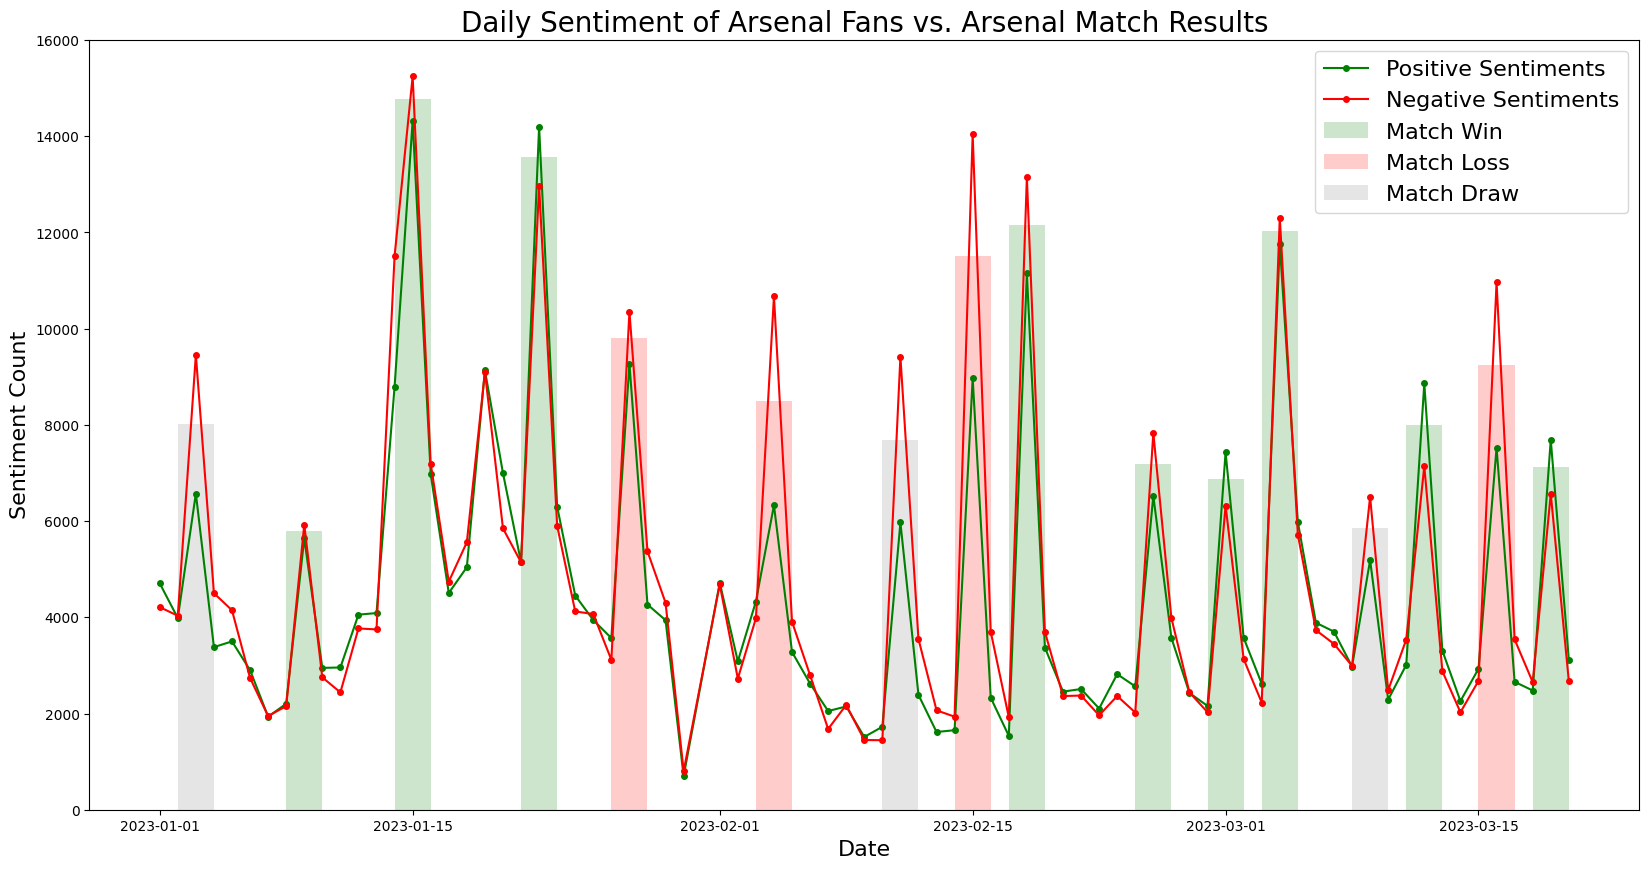

In [71]:
df_arsenal = df_arsenal[df_arsenal['date'] <= '2023-03-20']

# Create a figure and a set of subplots
plt.figure(figsize=(20,10))

# Plotting positive and negative sentiments as lines
plt.plot(df_arsenal['date'], df_arsenal['positive'], label='Positive Sentiments', color='green', marker='o', markersize=4)
plt.plot(df_arsenal['date'], df_arsenal['negative'], label='Negative Sentiments', color='red', marker='o', markersize=4)

# Adding bars for match results
# Assuming 'outcome' is the column with match results ('win', 'loss', 'draw', NaN for non-match days)
for outcome, color in zip(['win', 'loss', 'draw'], ['green', 'red', 'grey']):
    match_days = df_arsenal[df_arsenal['outcome'] == outcome]
    plt.bar(match_days['date'], (match_days['positive']+match_days['negative'])/2, color=color, alpha=0.2, label=f'Match {outcome.title()}', width=2)

# Adding labels and title
plt.xlabel('Date', fontsize=16)
plt.ylabel('Sentiment Count', fontsize=16)
plt.title('Daily Sentiment of Arsenal Fans vs. Arsenal Match Results', fontsize=20)

# Adding legend
plt.legend(fontsize=16)

# Show plot
plt.show()

This is a combined line and bar plot, showing the number of comments from Arsenal fans of positive and negative sentiments as lines, and the match result as bars (also showing the average number of positive and negative comments on matchdays). 

We can draw some interesting findings from this sentiment analysis: First, on the date when there was a match for Arsenal the comments number are much higher than the days when there was no match; Second, Arsenal fans tend to have rather balanced sentiments in their comments when there is no matches, however when Arsenal lost or draw a game, the number of negative comments are always higher than the positive comments, many times much higher. Even when Arsenal won, the fans did not really show much more positivity, sometimes even more negative when a match was won. Consider Arsenal has historically not been doing great during January to March, as they lost their leading position in the premier league in this time in 2023, it is understandable that their fans are not very optimistic.

### Man United

In [72]:
manu_matches = matches.loc[matches["team"]=='Man United',:]
manu_sentiments = pd.read_csv("./man_united_match_sentiment.csv")

# Pivot the DataFrame
manu_pivot_df = manu_sentiments.pivot_table(index='date', columns='sentiment_score', values='count').reset_index()

# Fill NaN values with 0
manu_pivot_df = manu_pivot_df.fillna(0)

manu_pivot_df['date'] = pd.to_datetime(manu_pivot_df['date'], format='%Y-%m-%d')

# Verify the changes
manu_pivot_df.head()

sentiment_score,date,negative,neutral,positive
0,2023-01-01,1493.0,149.0,1359.0
1,2023-01-02,2118.0,188.0,1794.0
2,2023-01-03,4276.0,441.0,4110.0
3,2023-01-04,2122.0,225.0,1998.0
4,2023-01-05,1602.0,177.0,1456.0


In [73]:
df_manu = (pd.merge(manu_matches, manu_pivot_df, on='date', how='outer')).sort_values(by='date').reset_index(drop=True)
df_manu.head()

,team,opponent,date,scored,conceded,outcome,tournament,negative,neutral,positive
0,NaN,NaN,2023-01-01,NaN,NaN,NaN,NaN,1493.0,149.0,1359.0
1,NaN,NaN,2023-01-02,NaN,NaN,NaN,NaN,2118.0,188.0,1794.0
2,Man United,Bournemouth,2023-01-03,3.0,0.0,win,Premier League,4276.0,441.0,4110.0
3,NaN,NaN,2023-01-04,NaN,NaN,NaN,NaN,2122.0,225.0,1998.0
4,NaN,NaN,2023-01-05,NaN,NaN,NaN,NaN,1602.0,177.0,1456.0


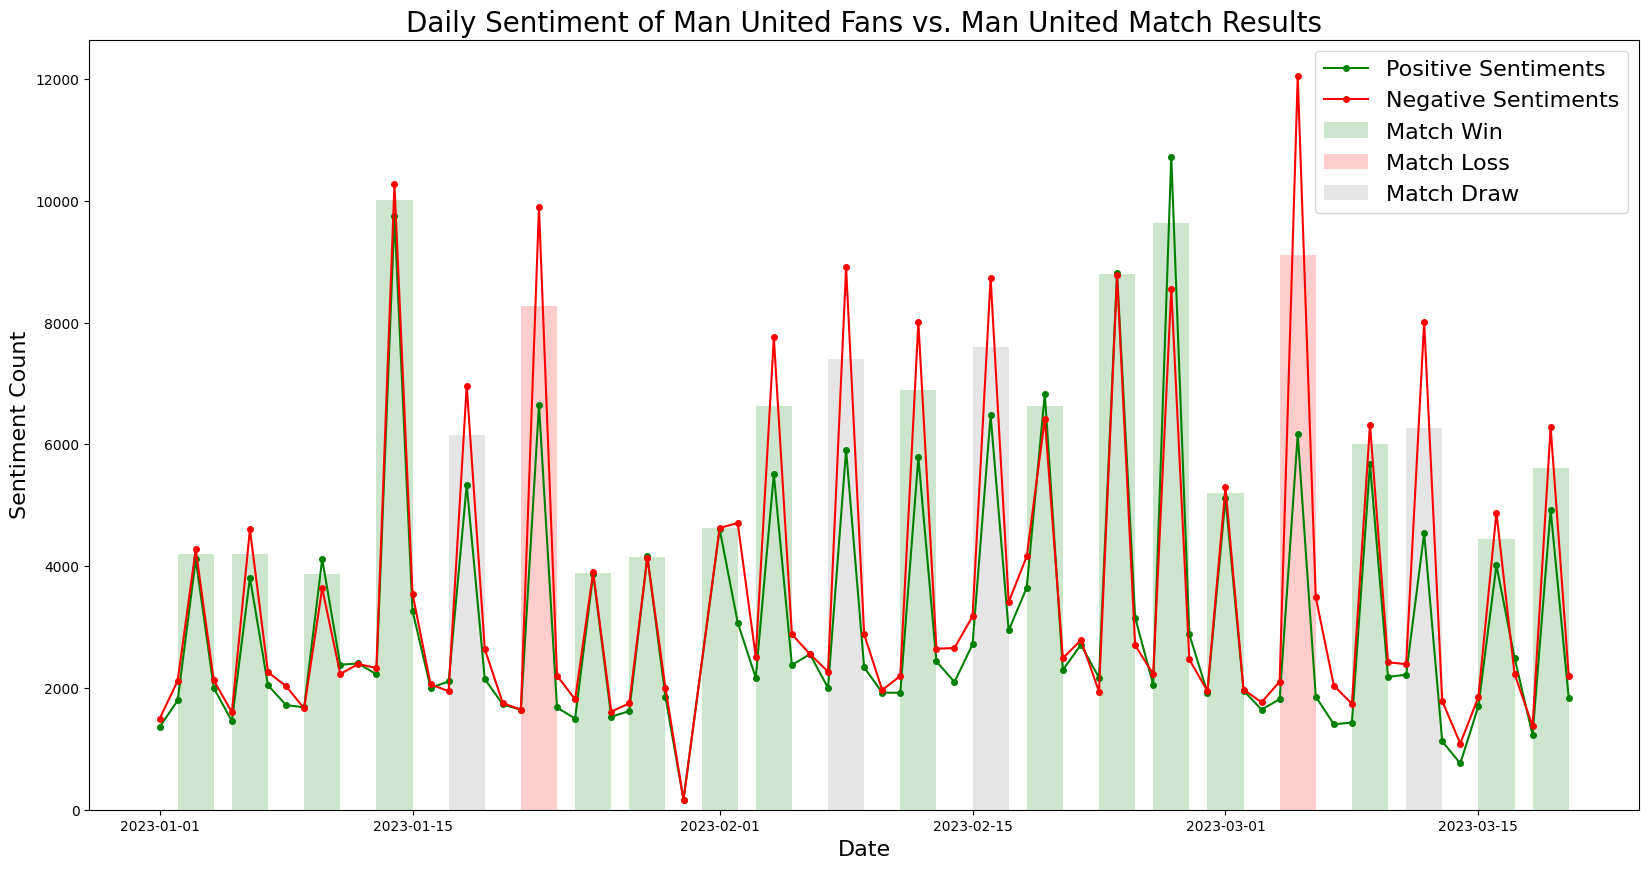

In [74]:
df_manu = df_manu[df_manu['date'] <= '2023-03-20']

# Create a figure and a set of subplots
plt.figure(figsize=(20,10))

# Plotting positive and negative sentiments as lines
plt.plot(df_manu['date'], df_manu['positive'], label='Positive Sentiments', color='green', marker='o', markersize=4)
plt.plot(df_manu['date'], df_manu['negative'], label='Negative Sentiments', color='red', marker='o', markersize=4)

# Adding bars for match results
# Assuming 'outcome' is the column with match results ('win', 'loss', 'draw', NaN for non-match days)
for outcome, color in zip(['win', 'loss', 'draw'], ['green', 'red', 'grey']):
    match_days = df_manu[df_manu['outcome'] == outcome]
    plt.bar(match_days['date'], (match_days['positive']+match_days['negative'])/2, color=color, alpha=0.2, label=f'Match {outcome.title()}', width=2)

# Adding labels and title
plt.xlabel('Date', fontsize=16)
plt.ylabel('Sentiment Count', fontsize=16)
plt.title('Daily Sentiment of Man United Fans vs. Man United Match Results', fontsize=20)

# Adding legend
plt.legend(fontsize=16)

# Show plot
plt.show()

This is a combined line and bar plot, showing the number of comments from Manchester United fans of positive and negative sentiments as lines, and the match result as bars (also showing the average number of positive and negative comments on matchdays).

The mood of Man United fans are clearly worse than Arsenal fans. Man United played more matches than Arsenal in this period, and despite winning most of them, on only three winning days the fans showed higher positivity than negativity in the comments; The fans always posted much more negative comments when there is a draw, and even though they only lost 2 matches, they lost to Arsenal first in January, and then lost 0 to 7 against Liverpool in March where this match resulted in extreme negative sentiments on this day. Overall, Manchester United fans are high demanding on their players, and losing to their biggest rival Liverpool in a brutal fashion led to a very sad and angry day for the fans.

### Chelsea

In [75]:
chelsea_matches = matches.loc[matches["team"]=='Chelsea',:]
chelsea_sentiments = pd.read_csv("./chelsea_match_sentiment.csv")

# Pivot the DataFrame
chelsea_pivot_df = chelsea_sentiments.pivot_table(index='date', columns='sentiment_score', values='count').reset_index()

# Fill NaN values with 0
chelsea_pivot_df = chelsea_pivot_df.fillna(0)

chelsea_pivot_df['date'] = pd.to_datetime(chelsea_pivot_df['date'], format='%Y-%m-%d')

# Verify the changes
chelsea_pivot_df.head()

sentiment_score,date,negative,neutral,positive
0,2023-01-01,4362.0,290.0,2715.0
1,2023-01-02,1941.0,142.0,1265.0
2,2023-01-03,1377.0,137.0,1200.0
3,2023-01-04,2013.0,197.0,1543.0
4,2023-01-05,5588.0,456.0,3741.0


In [76]:
df_chelsea = (pd.merge(chelsea_matches, chelsea_pivot_df, on='date', how='outer')).sort_values(by='date').reset_index(drop=True)
df_chelsea.head()

,team,opponent,date,scored,conceded,outcome,tournament,negative,neutral,positive
0,Chelsea,Nottingham Forest,2023-01-01,1.0,1.0,draw,Premier League,4362.0,290.0,2715.0
1,NaN,NaN,2023-01-02,NaN,NaN,NaN,NaN,1941.0,142.0,1265.0
2,NaN,NaN,2023-01-03,NaN,NaN,NaN,NaN,1377.0,137.0,1200.0
3,NaN,NaN,2023-01-04,NaN,NaN,NaN,NaN,2013.0,197.0,1543.0
4,Chelsea,Man City,2023-01-05,0.0,1.0,loss,Premier League,5588.0,456.0,3741.0


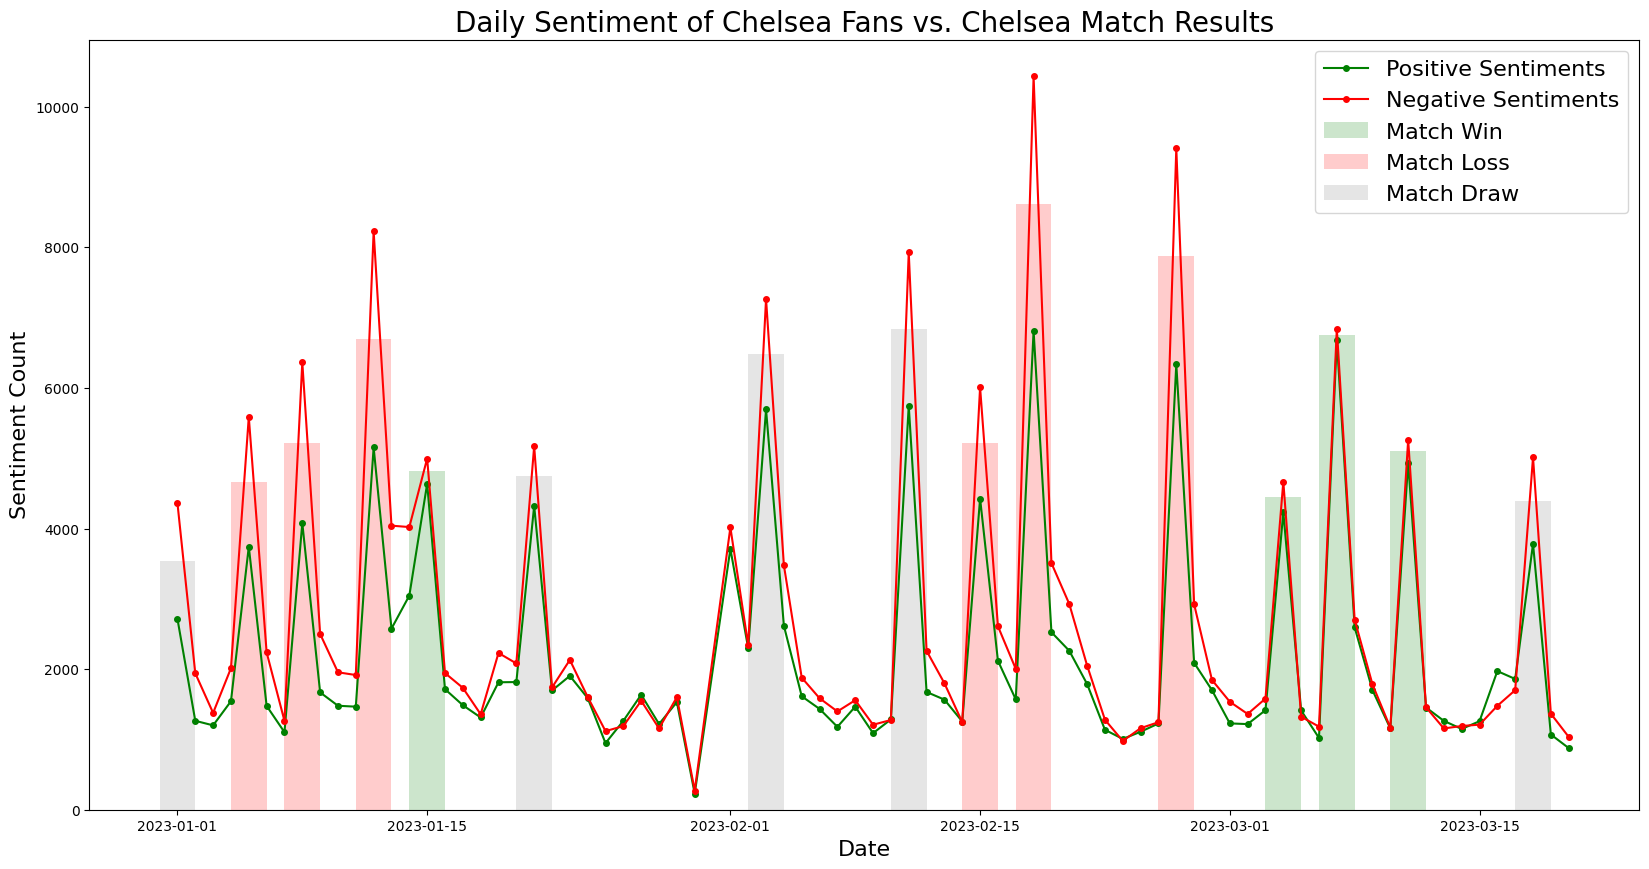

In [77]:
df_chelsea = df_chelsea[df_chelsea['date'] <= '2023-03-20']

# Create a figure and a set of subplots
plt.figure(figsize=(20,10))

# Plotting positive and negative sentiments as lines
plt.plot(df_chelsea['date'], df_chelsea['positive'], label='Positive Sentiments', color='green', marker='o', markersize=4)
plt.plot(df_chelsea['date'], df_chelsea['negative'], label='Negative Sentiments', color='red', marker='o', markersize=4)

# Adding bars for match results
# Assuming 'outcome' is the column with match results ('win', 'loss', 'draw', NaN for non-match days)
for outcome, color in zip(['win', 'loss', 'draw'], ['green', 'red', 'grey']):
    match_days = df_chelsea[df_chelsea['outcome'] == outcome]
    plt.bar(match_days['date'], (match_days['positive']+match_days['negative'])/2, color=color, alpha=0.2, label=f'Match {outcome.title()}', width=2)

# Adding labels and title
plt.xlabel('Date', fontsize=16)
plt.ylabel('Sentiment Count', fontsize=16)
plt.title('Daily Sentiment of Chelsea Fans vs. Chelsea Match Results', fontsize=20)

# Adding legend
plt.legend(fontsize=16)

# Show plot
plt.show()

This is a combined line and bar plot, showing the number of comments from Chelsea fans of positive and negative sentiments as lines, and the match result as bars (also showing the average number of positive and negative comments on matchdays).

The situation for Chelsea and their fans are the worst among the teams discussed. They lost 6 matches, tied 5 matches and only won 4, which is a not good performance by a top level team; as a result the fans are showing negative sentiment after every match, especially when they lost 3 matches in a row two times. Even for the 4 mathces they won, the fans still posted slightly less positive comments than negative ones. Chelsea was really struggling during this period, especially not being able to score, therefore their fans did have reasons to be upset about their team.